# THỰC HÀNH CLUSTERING

#### Hoàng Ngọc Thạch - MSSV: 14520811

#### Bài thực hành clustering. 

<a id='baitap2'></a>
# 2. Bài tập 2: Hand-writen digits

In [1]:
# Import library
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import pandas as pd

In [2]:
# Load dataset
digits = datasets.load_digits()

Dataset info:  (1797, 8, 8)


(-0.5, 7.5, 7.5, -0.5)

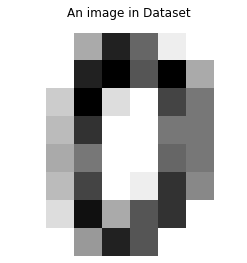

In [3]:
print('Dataset info: ', digits.images.shape)
# Import matplotlib to show data
import matplotlib.pyplot as plt
%matplotlib inline
#plt.gray()
plt.matshow(digits.images[0], cmap=plt.cm.binary)
plt.title('An image in Dataset')
plt.axis('off')

- Dataset gồm:
    - 1797 hình 8x8 đã được gán nhãn (digits.target).
    - 10 lớp. 


<a id='baitap2_kmean'></a>
## 2.1 KMean Clustering

In [4]:
# Apply KMeans clustering to data
number_clusters = 10
#create KMeans model
model = KMeans(n_clusters=number_clusters)

# fit model to data and predict on this data
label_kmean = model.fit_predict(digits.data)


In [5]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': label_kmean, 'Truth_labels': digits.target})
# Create a cross table
ct = pd.crosstab(df['labels'], df['Truth_labels'])
print(ct)

Truth_labels    0    1    2    3    4    5    6    7    8    9
labels                                                        
0               0   24  148    0    0    0    0    0    3    0
1               0    2    0    0    0    1  177    0    2    0
2               0  100    8    7    2    0    3    2  102    1
3               0    1    0    2    0  136    0    0    4    6
4               0    1   13  156    0    1    0    0    2    6
5               0    0    2   12    0   42    0    0   48  139
6               0   54    3    0    2    0    0   10   10   20
7             176    0    1    0    0    0    1    0    0    0
8               0    0    2    6   11    0    0  167    3    8
9               2    0    0    0  166    2    0    0    0    0


#### - Dựa trên cross table có thể thấy: 
    - Có sự nhập nhằng khó xác định cluster của hình digit 1 và hình digit 8.
    - Thông qua cluster center, có thể nhận ra 99 hình digit 1 được cho vào cluster của digit 8.
    - Không có hình noise.


#### - Clustering Center

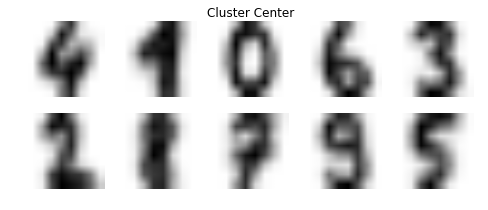

In [37]:
# create a fig to show image
fig = plt.figure(figsize=(8,3))
plt.title('Cluster Center')
plt.axis('off')
# for all 0-9 labels
for i in range(10):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(2, 5, 1+i)
    
    # display image
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    #don't show the axes
    plt.axis('off')

plt.show()

<a id='baitap2_spectral'></a>
## 2.2 Spectral Clustering

In [6]:
# import library
from sklearn.cluster import spectral_clustering
from sklearn.metrics.pairwise import cosine_similarity 

- Tính ma trận tương đồng giữa các sample
- Áp dụng thuật toán spectral_clustering trên ma trận tương đồng vừa tính.

In [7]:
graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)

#### Cross-table 

In [10]:
# create a DataFrame with labels and truth lables of digits data
df = pd.DataFrame({'labels': label_spectral, 'Truth_labels': digits.target})

# Create a cross-tablutation
ct = pd.crosstab(df['labels'], df['Truth_labels'])

print(ct)

Truth_labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  86   53    5    5    0    6   10  101    1
1               0   0    0   16    0   20    3    0    7  133
2               0   0    1  148    0    0    0    0    6    2
3               0  58    5    5    1    0    0   15   40   36
4             177   0    1    0    1    1    0    0    0    3
5               0   2    0    0    0    2  172    0   13    0
6               0   0    2    1   11    0    0  154    3    2
7               0  36  115    4    0    0    0    0    1    0
8               1   0    0    0  163    2    0    0    0    0
9               0   0    0    4    0  157    0    0    3    3


#### - Dựa trên cross table có thể thấy: 
    - Có sự nhập nhằng khó xác định cluster của hình digit 1 và hình digit 8.
    - Thông qua cluster center, có thể nhận ra phần lớn hình digit 1 được cho vào cluster của digit 8.
    - Không có hình noise.

<a id='baitap2_dbscan'></a>
## 2.3 DBSCAN

In [8]:
eps, min_samples = 0.0595 , 10

#import DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine', algorithm='brute')

label_dbscan = dbscan.fit_predict(digits.data)



#### Cross table

In [9]:
# print cross-table
df_dbscan = pd.DataFrame({'labels':label_dbscan,'Truth labels':digits.target})
ct_dbscan=pd.crosstab(df_dbscan['labels'],df_dbscan['Truth labels'])
print(ct_dbscan)

Truth labels    0    1    2    3    4   5    6    7   8    9
labels                                                      
-1              7   13   41   49   35  68    5   52  81   78
 0            171    0    0    0    0   0    0    0   0    0
 1              0  143    0    0    0   0    1    0  93    1
 2              0    0    0    0    0   0  175    0   0    0
 3              0    0    0  134    0   1    0    0   0  101
 4              0    0    0    0  146   0    0    0   0    0
 5              0    0  136    0    0   0    0    0   0    0
 6              0    0    0    0    0  65    0    0   0    0
 7              0    0    0    0    0   0    0  127   0    0
 8              0    0    0    0    0  48    0    0   0    0
 9              0   26    0    0    0   0    0    0   0    0


#### - Dựa trên cross table có thể thấy: 
    - Có sự nhập nhằng khó xác định cluster của hình digit 3 và hình digit 9.
    - Thông qua cluster center, có thể nhận ra phần lớn hình digit 3 được cho vào cluster của digit 9.
    - Có khá là nhiều hình không bị gán noise, không tìm được cluster. 

<a id='baitap2_agglomerative'></a>
## 2.4 Agglomerative Clustering

In [10]:
# import library
from sklearn.cluster import AgglomerativeClustering

aggModel = AgglomerativeClustering(n_clusters=10)

label_agglomerative = aggModel.fit_predict(digits.data)

#### Cross table

In [11]:
# print cross-table
df_dbscan = pd.DataFrame({'labels':label_agglomerative,'Truth labels':digits.target})
ct_dbscan=pd.crosstab(df_dbscan['labels'],df_dbscan['Truth labels'])
print(ct_dbscan)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    0    0    0  179    0    0    0    2
1               0   0    0  169    0    2    0    0    1  145
2               0  27  166    0    0    0    0    0    4    0
3               0   0    1    1    3    0    0  179    1   11
4               0   0   10   13    0    0    1    0  165    2
5               0   0    0    0  178    0    0    0    0    0
6               0   0    0    0    0    1  180    0    0    0
7             178   0    0    0    0    0    0    0    0    0
8               0  59    0    0    0    0    0    0    1   20
9               0  96    0    0    0    0    0    0    2    0


#### - Dựa trên cross table có thể thấy: 
    - Có sự nhập nhằng khó xác định cluster của hình digit 3 và hình digit 9.
    - Thông qua cluster center, có thể nhận ra phần lớn hình digit 3 được cho vào cluster của digit 9.
    - Không có hình noise.

<a id='baitap2_visualize'></a>
## 2.5 Visualize kết quả của thuật toán phân lớp 

<a id='baitap2_visualize_pca'></a>
### 2.5.1 PCA 

- Sử dụng thuật toán PCA để giảm số chiều features.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(digits.data)

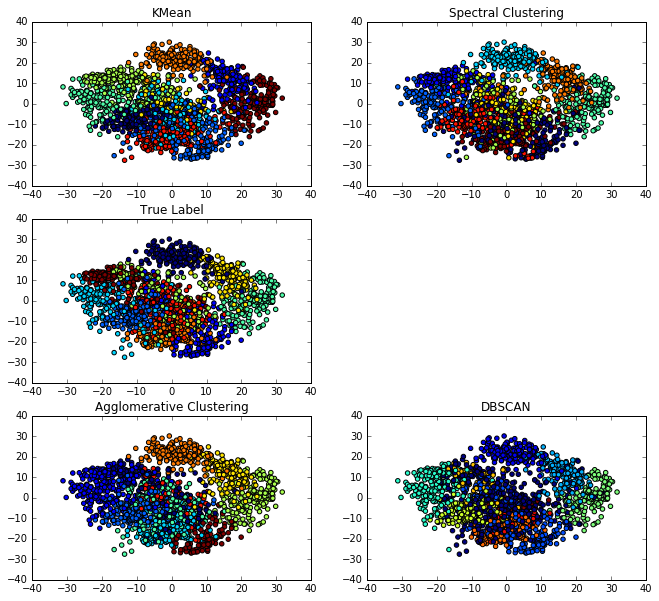

In [13]:
# create a fig to show image
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(3, 2, 1)
ax.scatter(pca[:,0],pca[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(pca[:,0],pca[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(pca[:,0],pca[:,1], c=digits.target)
ax.set_title('True Label')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(pca[:,0],pca[:,1], c=label_agglomerative)
ax.set_title('Agglomerative Clustering')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(pca[:,0],pca[:,1], c=label_dbscan)
ax.set_title('DBSCAN')

plt.show()

<a id='baitap2_visualize_tsne'></a>
### 2.5.2 Visualize by T-SNE
- T-SNE giảm số chiều của data về số liệu 2 chiều. 

In [14]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate=100)

tnse = TSNE_model.fit_transform(digits.data)

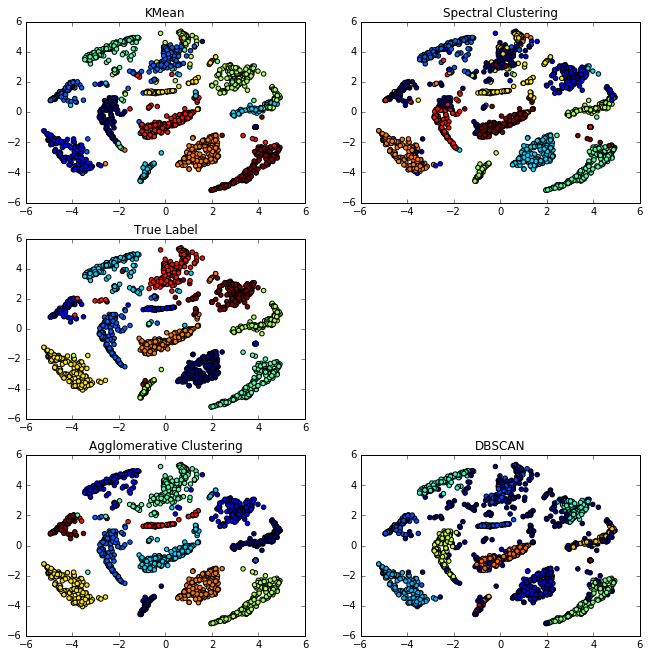

In [15]:
# create a fig to show image
fig = plt.figure(figsize=(11,11))

ax = fig.add_subplot(3, 2, 1)
ax.scatter(tnse[:,0],tnse[:,1], c=label_kmean)
ax.set_title('KMean')

ax = fig.add_subplot(3, 2, 2)
ax.scatter(tnse[:,0],tnse[:,1], c=label_spectral)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3, 2, 3)
ax.scatter(tnse[:,0],tnse[:,1], c=digits.target)
ax.set_title('True Label')

ax = fig.add_subplot(3, 2, 5)
ax.scatter(tnse[:,0],tnse[:,1], c=label_agglomerative)
ax.set_title('Agglomerative Clustering')

ax = fig.add_subplot(3, 2, 6)
ax.scatter(tnse[:,0],tnse[:,1], c=label_dbscan)
ax.set_title('DBSCAN')

plt.show()


<a id='baitap2_evaluate'></a>
## 2.6 Evaluate clustering algorithm

- Sử dụng các hệ đo lường để đánh giá thuật toán: Homogeneity, Completeness, V-measure, Adjusted Random, Adjusted Mutual Information.

In [60]:
from sklearn import metrics
def compareAlgorithm(algorithms, targetLabel, data):
    print('#Sample: %d\t#Class: 10\t#feature: %d'%(data.shape[0], data.shape[1]))
    print(82*'_')
    print('init\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    for algorithm in algorithms:
        print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (algorithm,
                 metrics.homogeneity_score(targetLabel, algorithms[algorithm]),
                 metrics.completeness_score(targetLabel, algorithms[algorithm]),
                 metrics.v_measure_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_rand_score(targetLabel, algorithms[algorithm]),
                 metrics.adjusted_mutual_info_score(targetLabel,  algorithms[algorithm]),
                 metrics.silhouette_score(data, algorithms[algorithm],
                                          metric='euclidean',
                                          sample_size=300)))
    print(82*'_')

In [61]:
compareAlgorithm({'KMean':label_kmean, 'Spectral':label_spectral,'DBSCAN':label_dbscan,'Agglomerative':label_agglomerative},\
                 digits.target, digits.data)

#Sample: 1797	#Class: 10	#feature: 64
__________________________________________________________________________________
init		homo	compl	v-meas	ARI	AMI	silhouette
DBSCAN   	0.703	0.739	0.721	0.495	0.700	0.093
Spectral 	0.714	0.718	0.716	0.626	0.711	0.158
KMean    	0.737	0.745	0.741	0.666	0.734	0.177
Agglomerative	0.858	0.879	0.868	0.794	0.856	0.158
__________________________________________________________________________________


### Nhận xét:
- Dựa trên bảng số liệu. Có thể thấy thuật toán Agglomerative cho ra kết quả chính xác hơn DBSCAN, Spectral, KMean với raw digit data.